In [23]:
import sys

sys.path.insert(0, '..')

In [39]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
from typing import List
import numpy as np

In [40]:
transform = transforms.Compose([transforms.ToTensor()])
image_path = './'

mnist_train_dataset = torchvision.datasets.MNIST(root=image_path, train=True, download=True, transform=transform)
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path, train=False, download=False, transform=transform)

In [41]:
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size=batch_size, shuffle=True)

In [42]:
hidden_units = [32, 16]

img_size = mnist_train_dataset[0][0].shape
input_size = img_size[1] * img_size[2]

assert input_size == 28 * 28

all_layers: List[nn.Module] = [nn.Flatten()]
for unit in hidden_units:
    layer = nn.Linear(in_features=input_size, out_features=unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = unit

output_layer = nn.Linear(in_features=hidden_units[-1], out_features=10)
all_layers.append(output_layer)
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [43]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [44]:
num_epochs = 20

training_accuracy_hist = [0.0] * num_epochs

for epoch in range(num_epochs):
    epoch_training_accuracy = 0.0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        epoch_training_accuracy += is_correct.sum()
    epoch_training_accuracy /= len(train_dl.dataset)
    training_accuracy_hist[epoch] = epoch_training_accuracy
    print(f"Accuracy for epoch {epoch}: {epoch_training_accuracy:.2f}")

Accuracy for epoch 0: 0.85
Accuracy for epoch 1: 0.93
Accuracy for epoch 2: 0.94
Accuracy for epoch 3: 0.95
Accuracy for epoch 4: 0.95
Accuracy for epoch 5: 0.96
Accuracy for epoch 6: 0.96
Accuracy for epoch 7: 0.96
Accuracy for epoch 8: 0.97
Accuracy for epoch 9: 0.97
Accuracy for epoch 10: 0.97
Accuracy for epoch 11: 0.97
Accuracy for epoch 12: 0.97
Accuracy for epoch 13: 0.98
Accuracy for epoch 14: 0.98
Accuracy for epoch 15: 0.98
Accuracy for epoch 16: 0.98
Accuracy for epoch 17: 0.98
Accuracy for epoch 18: 0.98
Accuracy for epoch 19: 0.98


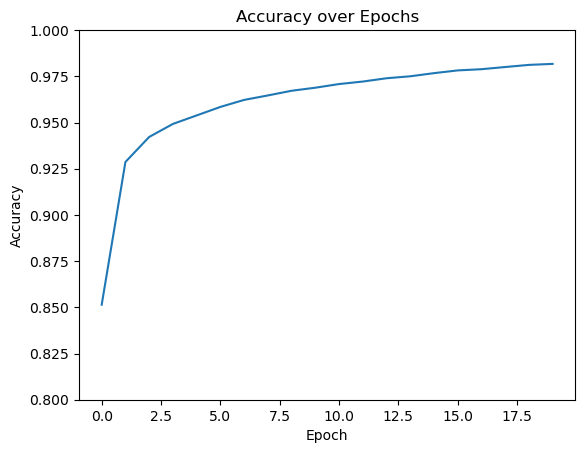

In [45]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((.8, 1))

plt.title('Accuracy over Epochs')
plt.plot(np.arange(num_epochs), training_accuracy_hist)

plt.savefig('training_accuracy.png')

In [46]:
pred = model(mnist_test_dataset.data / 255.)
is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.2f}')

Test accuracy: 0.97
